In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/pakistan-house-price-prediction/Entities.csv')
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [2]:
df = df.drop(['Unnamed: 0','page_url','date_added','agency','agent'],axis=1)
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,1089.004
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,15246.056
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2178.008
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,10890.000
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2178.008


In [3]:
df.isnull().sum()

property_id      0
location_id      0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
Total_Area       0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   property_type  168446 non-null  object 
 3   price          168446 non-null  int64  
 4   location       168446 non-null  object 
 5   city           168446 non-null  object 
 6   province_name  168446 non-null  object 
 7   latitude       168446 non-null  float64
 8   longitude      168446 non-null  float64
 9   baths          168446 non-null  int64  
 10  purpose        168446 non-null  object 
 11  bedrooms       168446 non-null  int64  
 12  Total_Area     168446 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 16.7+ MB


In [6]:
df.property_type.unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [7]:
df.property_type = df.property_type.replace(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion','Upper Portion', 'Room'],[3,4,5,6,1,2,0])
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
0,237062,3325,3,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,1089.004
1,346905,3236,3,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,15246.056
2,386513,764,4,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2178.008
3,656161,340,4,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,10890.000
4,841645,3226,4,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2178.008


In [8]:
df = df.drop(['location'],axis=1)
df.head()

,property_id,location_id,property_type,price,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
0,237062,3325,3,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,1089.004
1,346905,3236,3,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,15246.056
2,386513,764,4,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2178.008
3,656161,340,4,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,10890.000
4,841645,3226,4,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2178.008


In [9]:
df.city.unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [10]:
df.city = df.city.replace(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],[4,3,0,1,2])
df.head()

,property_id,location_id,property_type,price,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
0,237062,3325,3,10000000,4,Islamabad Capital,33.679890,73.012640,2,For Sale,2,1089.004
1,346905,3236,3,6900000,4,Islamabad Capital,33.700993,72.971492,3,For Sale,3,15246.056
2,386513,764,4,16500000,4,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2178.008
3,656161,340,4,43500000,4,Islamabad Capital,33.707573,73.151199,4,For Sale,4,10890.000
4,841645,3226,4,7000000,4,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2178.008


In [11]:
df.province_name.unique()

array(['Islamabad Capital', 'Punjab', 'Sindh'], dtype=object)

In [12]:
df.province_name = df.province_name.replace(['Islamabad Capital', 'Punjab', 'Sindh'],[2,1,0])
df.head()

,property_id,location_id,property_type,price,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
0,237062,3325,3,10000000,4,2,33.679890,73.012640,2,For Sale,2,1089.004
1,346905,3236,3,6900000,4,2,33.700993,72.971492,3,For Sale,3,15246.056
2,386513,764,4,16500000,4,2,33.631486,72.926559,6,For Sale,5,2178.008
3,656161,340,4,43500000,4,2,33.707573,73.151199,4,For Sale,4,10890.000
4,841645,3226,4,7000000,4,2,33.492591,73.301339,3,For Sale,3,2178.008


In [13]:
df.purpose.unique()

array(['For Sale', 'For Rent'], dtype=object)

In [14]:
df.purpose = df.purpose.replace(['For Sale', 'For Rent'],[1,0])
df.head()

,property_id,location_id,property_type,price,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
0,237062,3325,3,10000000,4,2,33.679890,73.012640,2,1,2,1089.004
1,346905,3236,3,6900000,4,2,33.700993,72.971492,3,1,3,15246.056
2,386513,764,4,16500000,4,2,33.631486,72.926559,6,1,5,2178.008
3,656161,340,4,43500000,4,2,33.707573,73.151199,4,1,4,10890.000
4,841645,3226,4,7000000,4,2,33.492591,73.301339,3,1,3,2178.008


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   property_type  168446 non-null  int64  
 3   price          168446 non-null  int64  
 4   city           168446 non-null  int64  
 5   province_name  168446 non-null  int64  
 6   latitude       168446 non-null  float64
 7   longitude      168446 non-null  float64
 8   baths          168446 non-null  int64  
 9   purpose        168446 non-null  int64  
 10  bedrooms       168446 non-null  int64  
 11  Total_Area     168446 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 15.4 MB


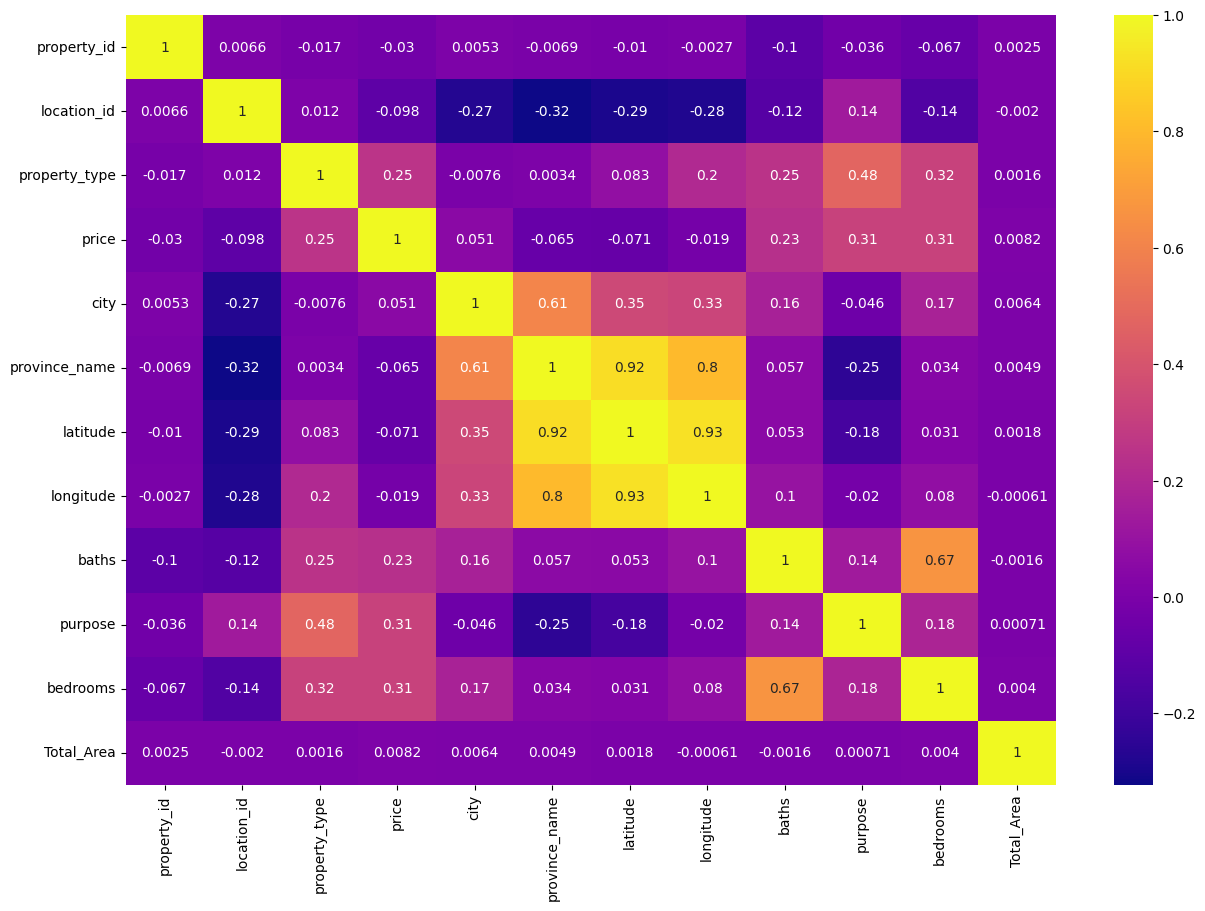

In [16]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

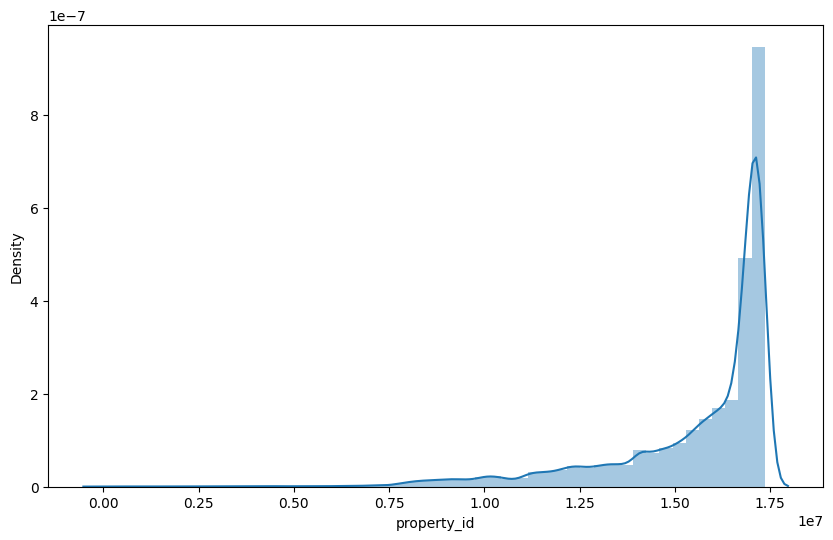

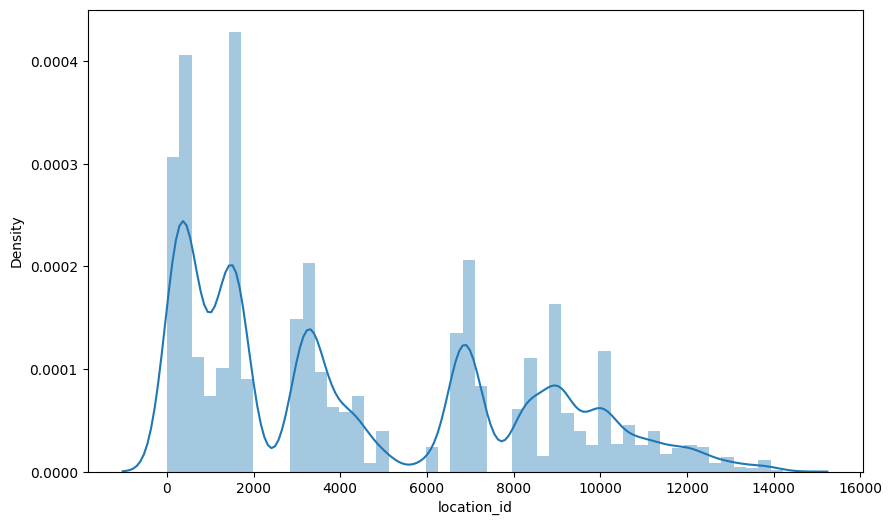

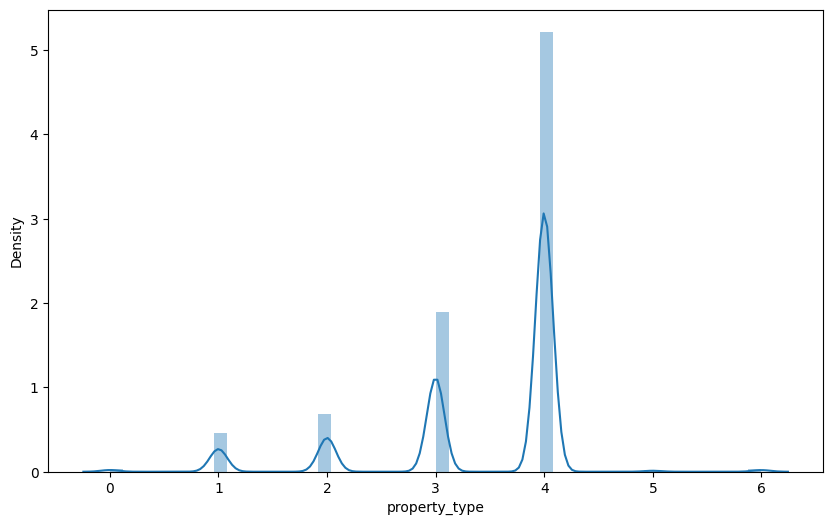

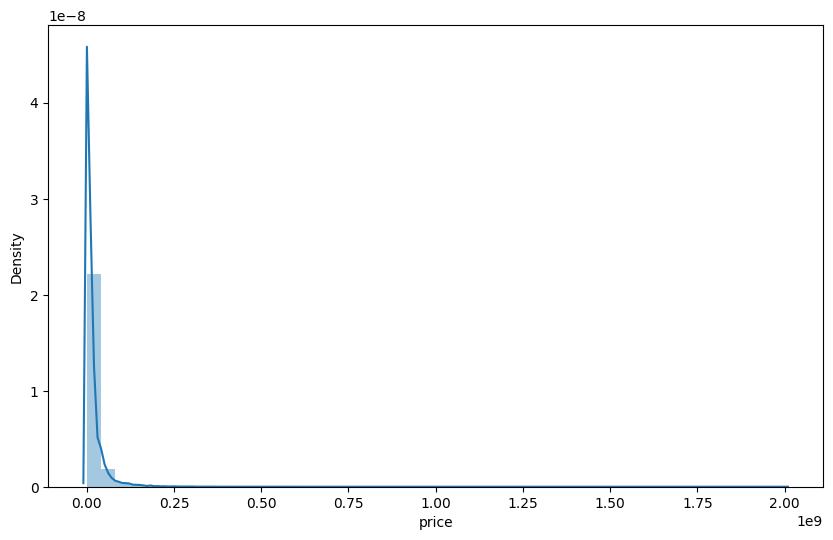

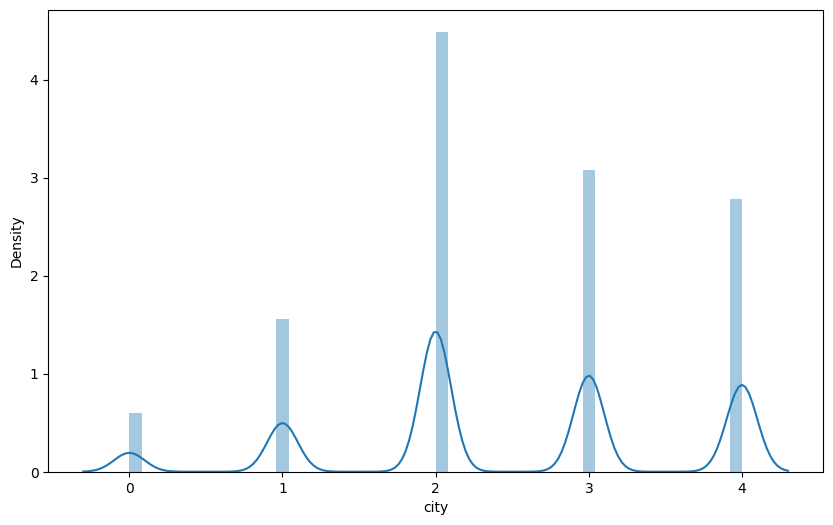

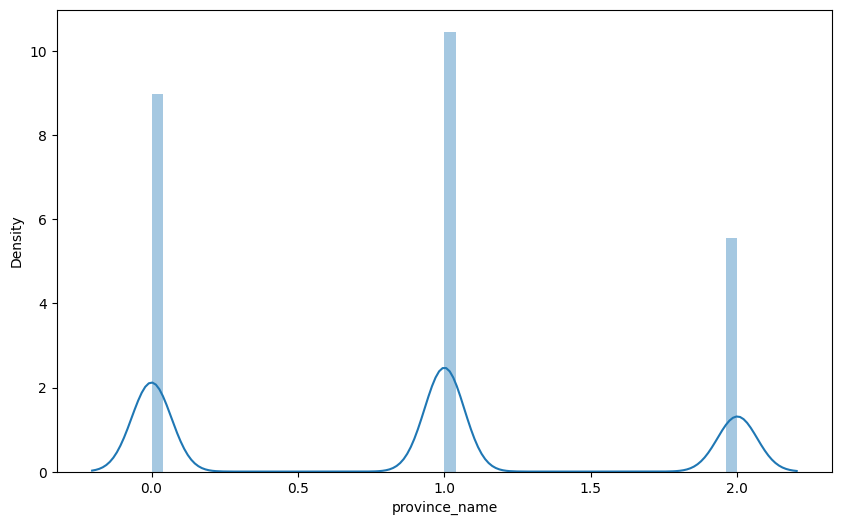

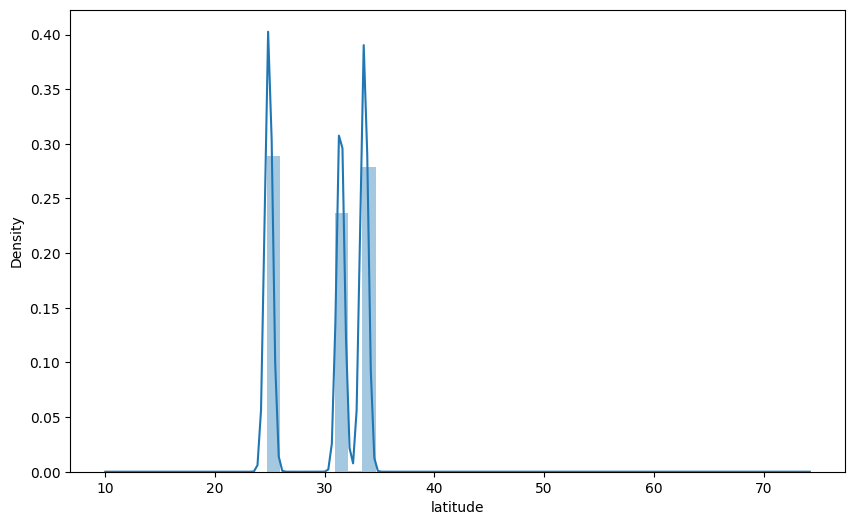

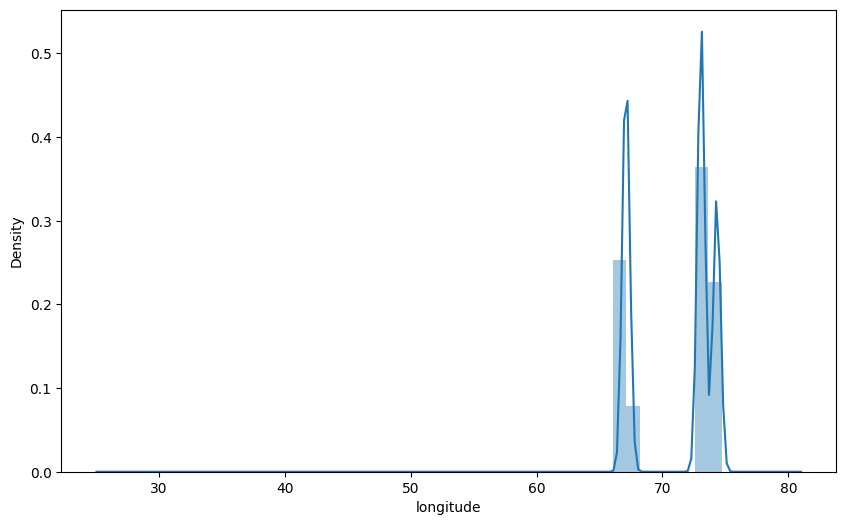

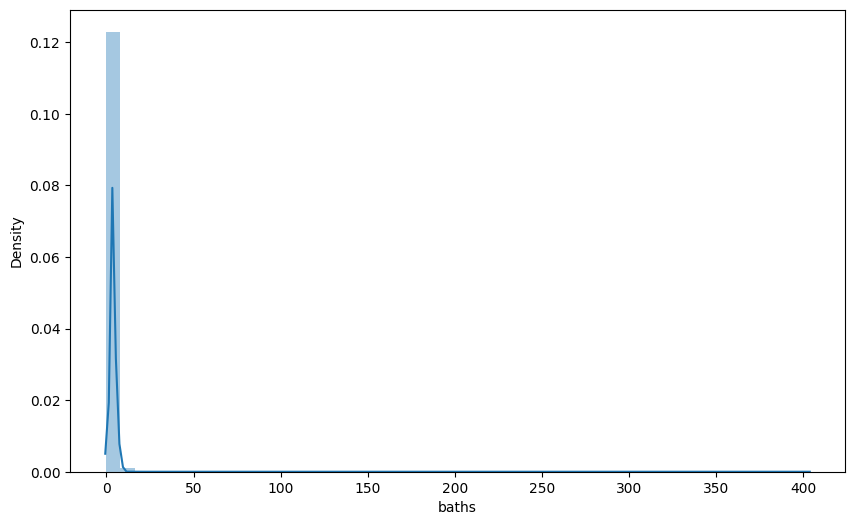

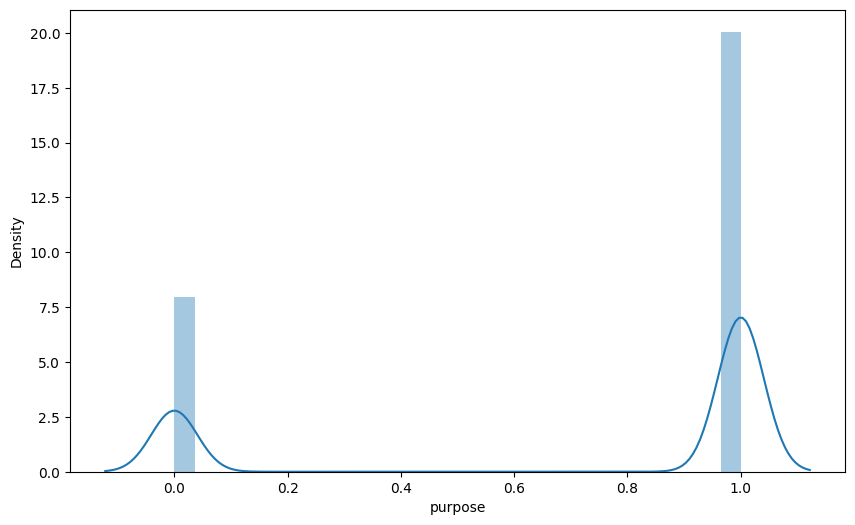

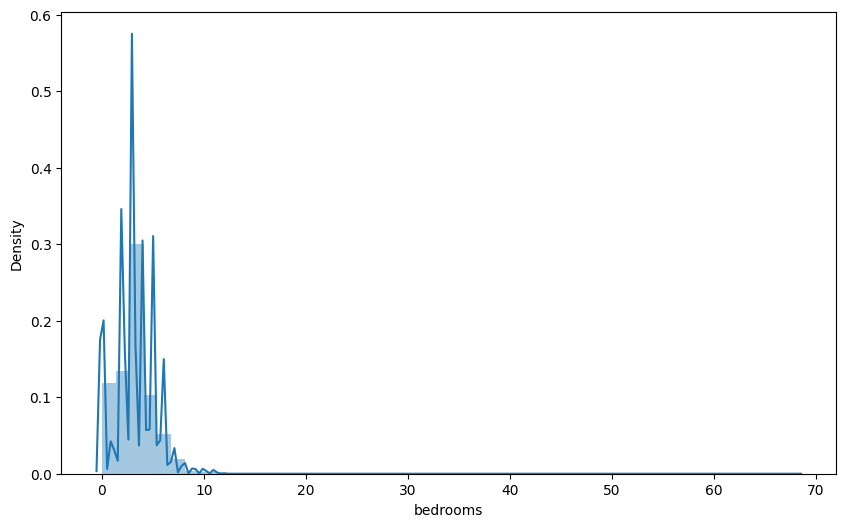

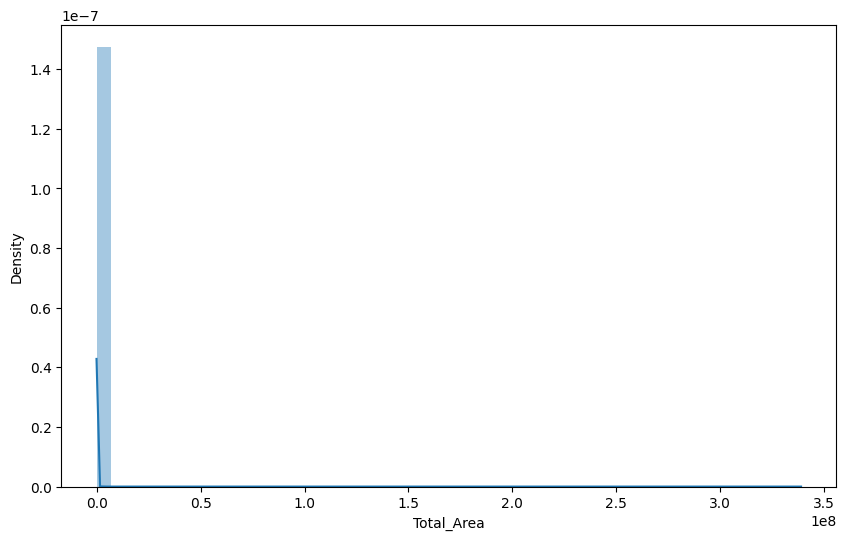

In [17]:
#check dist of all columns
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.show()

In [18]:
df.price.value_counts()

price
15000000     2589
35000        2522
6500000      2415
8500000      2154
12500000     2117
             ... 
91000           1
3590000         1
207500000       1
7669000         1
421000          1
Name: count, Length: 2077, dtype: int64

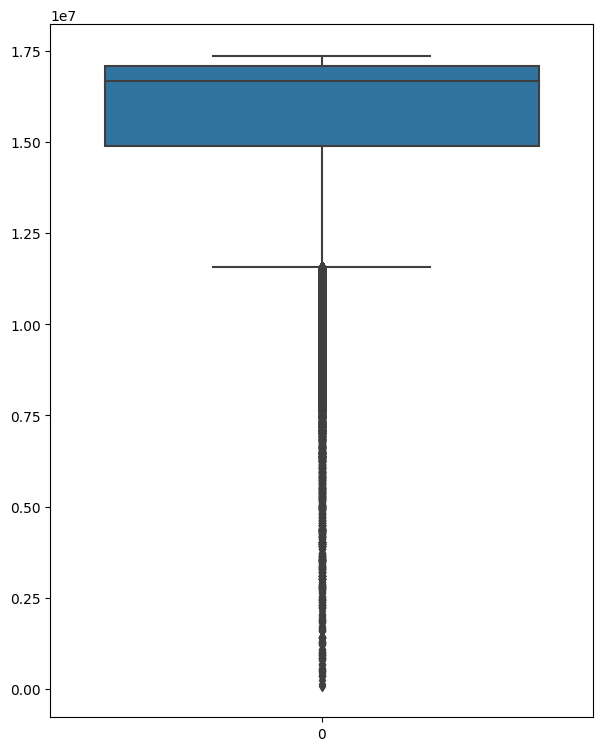

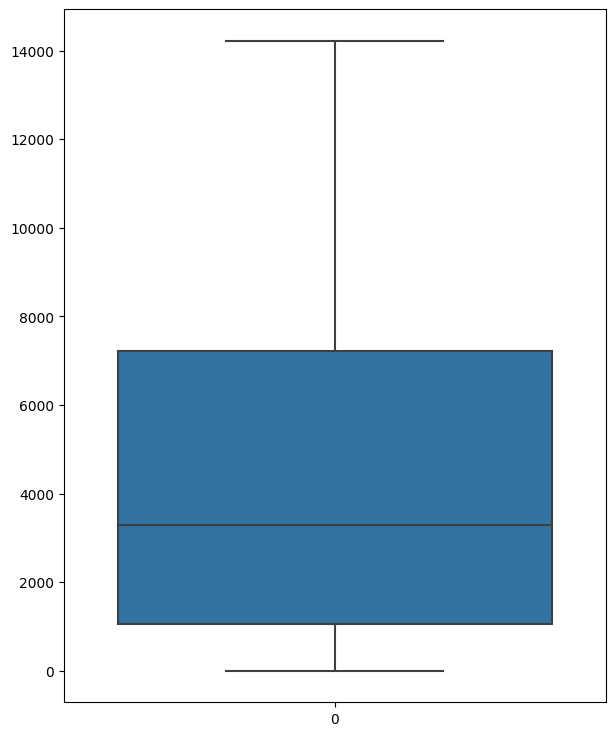

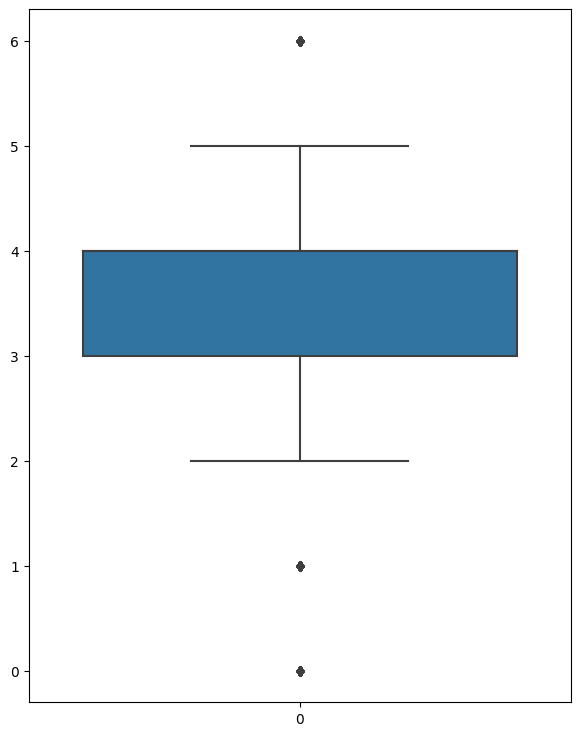

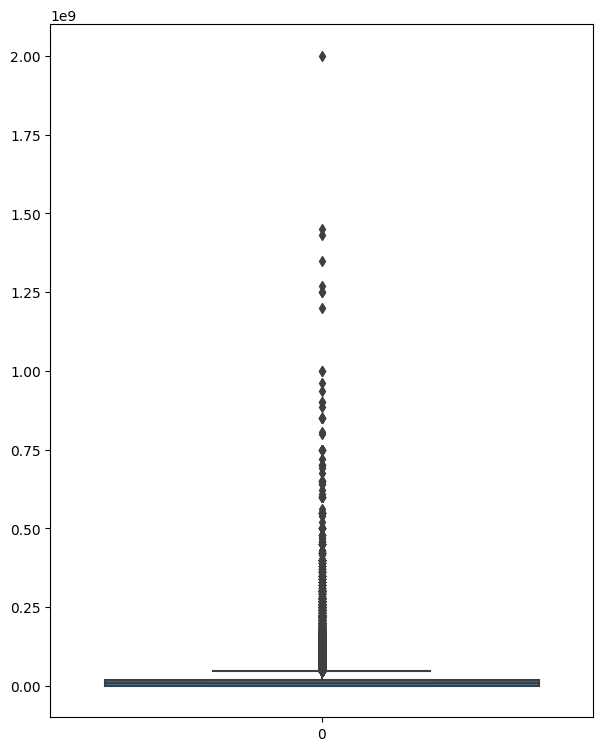

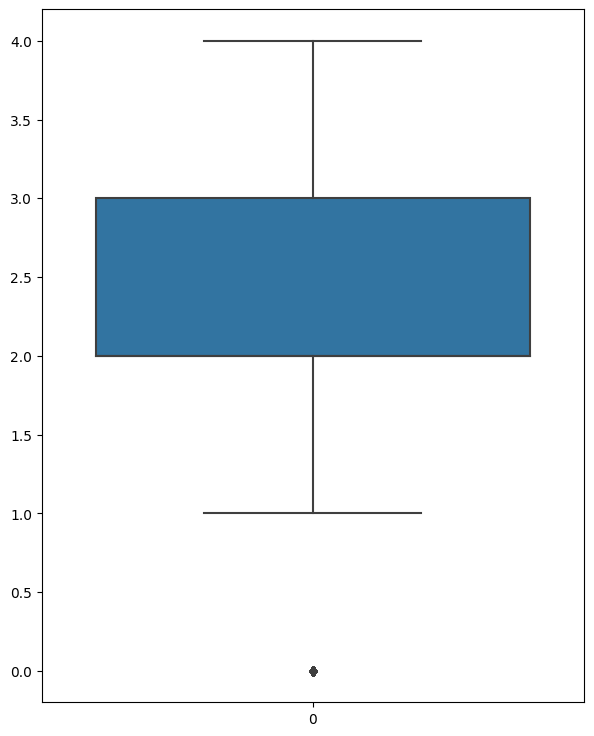

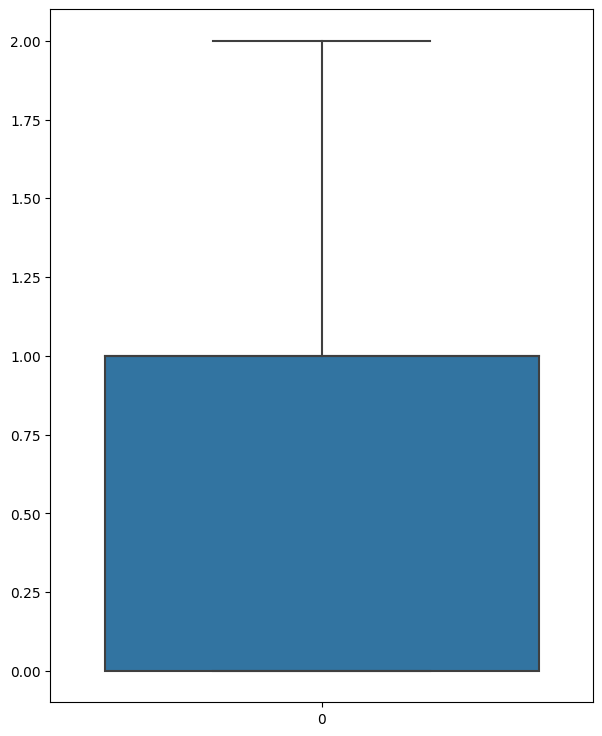

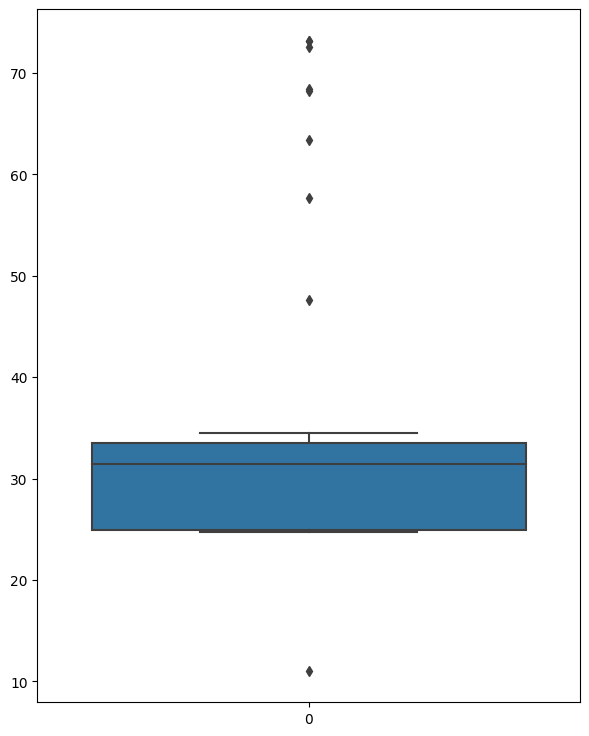

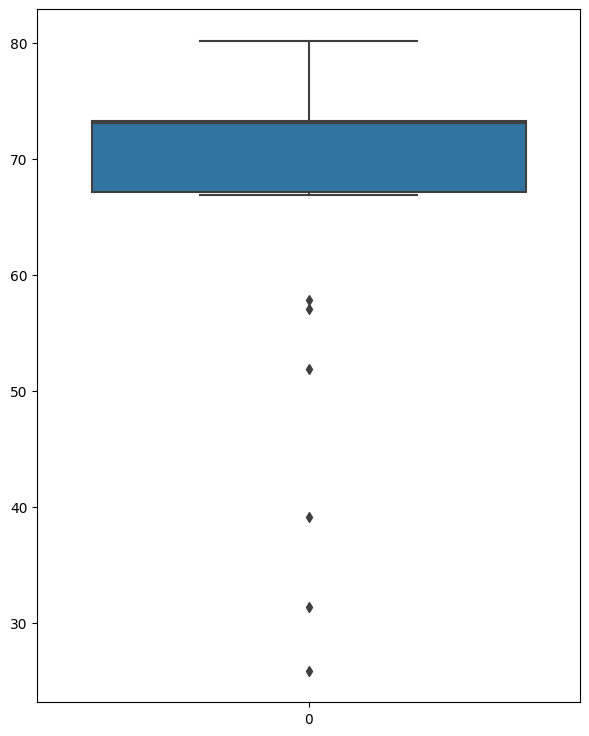

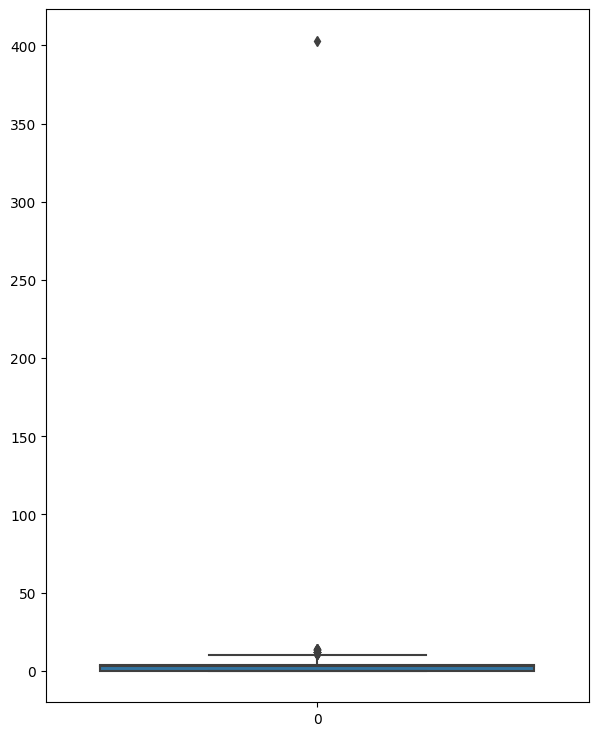

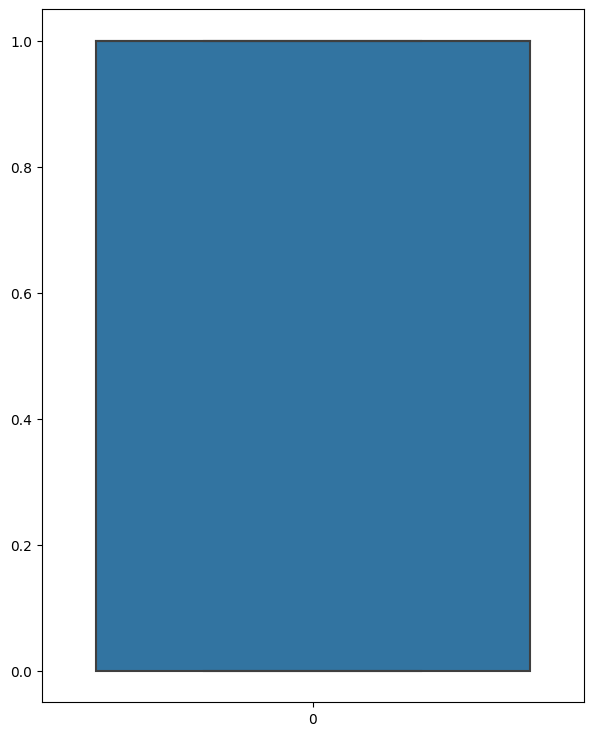

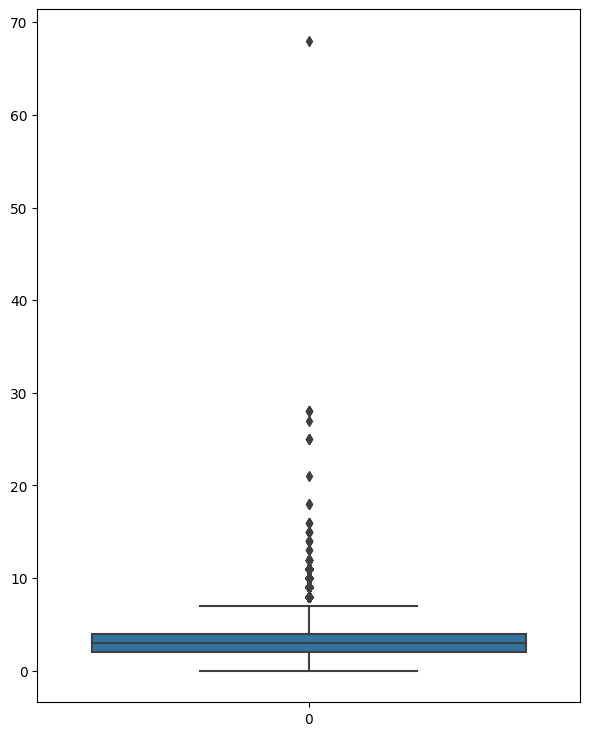

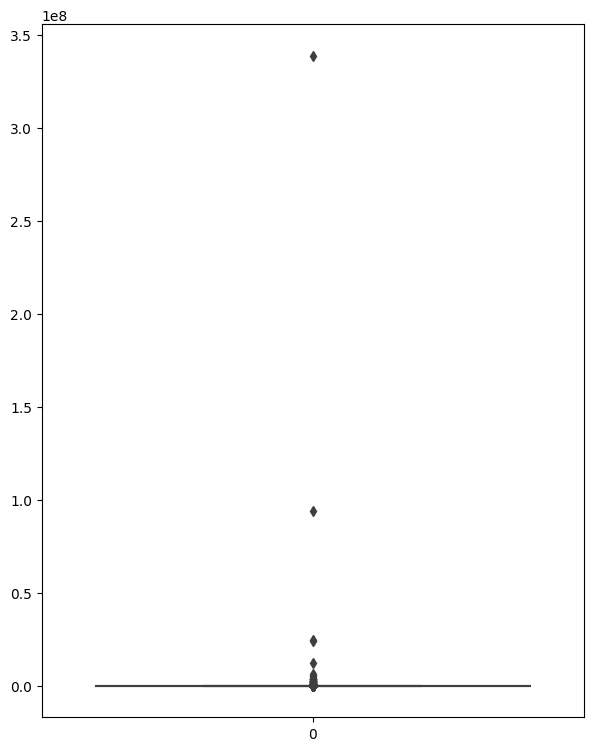

In [19]:
#check the boxplot of all the columns in df

for col in df.columns:
  plt.figure(figsize=(7,9))
  sns.boxplot(df[col])
  plt.show()

In [26]:
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'city',
       'province_name', 'latitude', 'longitude', 'baths', 'purpose',
       'bedrooms', 'Total_Area'],
      dtype='object')

In [27]:
#NOW split the data
x = df.drop(['price','location_id','property_id'],axis=1)
y = df['price']

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)


LinearRegression()

In [28]:
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)


Lasso()

In [29]:
en.fit(x_train_scaled,y_train)
#rf.fit(x_train_scaled,y_train) #Taking too much time


ElasticNet()

In [30]:
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)


AdaBoostRegressor()

In [31]:
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)


KNeighborsRegressor()

In [32]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
#rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)


#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
#rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)


print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
#print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)


LINEAR REG  0.17982368583234598
RIDGE  0.1798237618309274
LASSO  0.17982368845350605
ELASTICNET 0.169526924634669
GB 0.6573788934414837
ADABOOST -0.16721946930861353
XGB 0.8183286690785447
KNN 0.7063700857706359


SO WE SAW AN IMPROVEMENT IN THE R2 SCORE WHEN DROPPING 2 COLUMNS

Without removing the columns

LINEAR REG  0.1934332858213743

RIDGE  0.19343329863635372

LASSO  0.19343328793302772

ELASTICNET 0.18075952725470112

GB 0.6588613259482639

ADABOOST 0.1524567080173852

XGB 0.7731613917855414

KNN 0.4852186683237737
